In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (33/33), 177.08 MiB | 14.27 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:

# Check what files are in the PubMed_20K dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:

# Check all of the filenames in the target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

In [ ]:

# Create function to read the lines of a document
def get_lines(filename):
  """
  Reads filename (a text file) and returns the lines of text as a list.

  Args:
      filename: a string containing the target filepath to read.

  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20] # the whole first example of
test_lines = get_lines(data_dir+"test.txt")
val_lines = get_lines(data_dir+"dev.txt")

In [ ]:

def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list

    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples

In [ ]:
out=[]
inp=[]
for i in train_lines:
  if(len(i.split('\t'))!=1):
    out.append(i.split('\t')[0])
    inp.append((i.split('\t')[1]).strip("\n"))


In [ ]:
out2=[]
inp2=[]
for i in test_lines:
  if(len(i.split('\t'))!=1):
    out2.append(i.split('\t')[0])
    inp2.append((i.split('\t')[1]).strip("\n"))


In [ ]:
out3=[]
inp3=[]
for i in val_lines:
  if(len(i.split('\t'))!=1):
    out3.append(i.split('\t')[0])
    inp3.append((i.split('\t')[1]).strip("\n"))


In [ ]:
out
inp

['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .',
 'Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .',
 'There was a clinic

In [ ]:
data={'input':inp,'output':out}

train_df=pd.DataFrame(data)

In [ ]:
data2={'input':inp2,'output':out2}

test_df=pd.DataFrame(data2)

In [ ]:
data3={'input':inp3,'output':out3}

val_df=pd.DataFrame(data3)

In [ ]:
train_df

,input,output
0,To investigate the efficacy of @ weeks of dail...,OBJECTIVE
1,A total of @ patients with primary knee OA wer...,METHODS
2,Outcome measures included pain reduction and i...,METHODS
3,Pain was assessed using the visual analog pain...,METHODS
4,Secondary outcome measures included the Wester...,METHODS
...,...,...
180035,For the absolute change in percent atheroma vo...,RESULTS
180036,"For PAV , a significantly greater percentage o...",RESULTS
180037,Both strategies had acceptable side effect pro...,RESULTS
180038,"Compared with standard statin monotherapy , th...",CONCLUSIONS


In [ ]:
test_df

,input,output
0,This study analyzed liver function abnormaliti...,BACKGROUND
1,A post hoc analysis was conducted with the use...,RESULTS
2,Liver function tests ( LFTs ) were measured at...,RESULTS
3,Survival analyses were used to assess the asso...,RESULTS
4,The percentage of patients with abnormal LFTs ...,RESULTS
...,...,...
30130,There was a statistically significant between-...,RESULTS
30131,There were no statistically significant betwee...,RESULTS
30132,There was no significant association between s...,RESULTS
30133,No adverse effects were reported .,RESULTS


In [ ]:
val_df

,input,output
0,IgE sensitization to Aspergillus fumigatus and...,BACKGROUND
1,It is not clear whether these patients would b...,BACKGROUND
2,We sought to determine whether a @-month cours...,OBJECTIVE
3,Asthmatic patients who were IgE sensitized to ...,METHODS
4,Primary outcomes were improvement in quality o...,METHODS
...,...,...
30207,Pruritus occurred more frequently with the act...,RESULTS
30208,Three patients in the active-regimen group ( @...,RESULTS
30209,Hemoglobin values of grade @ ( @ to < @ g per ...,RESULTS
30210,Rates of response to a @-week interferon-free ...,CONCLUSIONS


In [ ]:
val_df['output'].value_counts()

METHODS        9964
RESULTS        9841
CONCLUSIONS    4582
BACKGROUND     3449
OBJECTIVE      2376
Name: output, dtype: int64

In [ ]:
len(train_df['output'])

180040

In [ ]:

# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["output"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["output"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["output"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# Extract labels ("target" columns) and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["output"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["output"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["output"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train = train_df['input']
y_train=train_labels_encoded

X_test = test_df['input']
y_test=test_labels_encoded

combined_df = pd.concat([train_df['input'], test_df['input']], axis=0)

tfidf_vectorizer = TfidfVectorizer()
X_combined = tfidf_vectorizer.fit_transform(combined_df)

# Transform X_train and X_test using the same vectorizer
X_train = tfidf_vectorizer.transform(train_df['input'])
X_test = tfidf_vectorizer.transform(test_df['input'])

nb_classifier = MultinomialNB()

# Step 5: Model Training
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)



# Print classification report, confusion matrix, and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.47      0.54      3621
           1       0.63      0.58      0.61      4571
           2       0.73      0.88      0.79      9897
           3       0.74      0.14      0.23      2333
           4       0.76      0.85      0.80      9713

    accuracy                           0.72     30135
   macro avg       0.70      0.58      0.60     30135
weighted avg       0.71      0.72      0.69     30135

Confusion Matrix:
 [[1694  855  751   93  228]
 [ 278 2658  387    4 1244]
 [ 107   77 8682    8 1023]
 [ 524  428  933  317  131]
 [  23  184 1207    5 8294]]
Accuracy: 0.7182677949228472


In [ ]:
text_vectorizer=tf.keras.layers.TextVectorization(max_tokens=20000,
                                                  standardize="lower_and_strip_punctuation",
                                                  split="whitespace"
                                                  )
text_vectorizer.adapt(train_df['input'].to_numpy())

In [ ]:
embedding=tf.keras.layers.Embedding(input_dim=20000,
                                    output_dim=128
                                    )

In [ ]:
inputs=tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=tf.keras.layers.Conv1D(filters=32,
                         kernel_size=5,
                         strides=1,
                         padding="same"
                         )(x)
x=tf.keras.layers.GlobalMaxPooling1D()(x)
outputs=tf.keras.layers.Dense(5,activation='softmax')(x)
model1=tf.keras.Model(inputs,outputs)

model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer="adam",metrics=['accuracy'])

In [ ]:
X_train=train_df['input'].to_numpy()
y_train=train_labels_encoded
X_val=val_df['input'].to_numpy()
y_val=val_labels_encoded

In [ ]:
model1.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),epochs=3)

Epoch 1/3
5627/5627 [==============================] - 98s 16ms/step - loss: 0.5540 - accuracy: 0.7963 - val_loss: 0.4809 - val_accuracy: 0.8220
Epoch 2/3
5627/5627 [==============================] - 40s 7ms/step - loss: 0.3846 - accuracy: 0.8627 - val_loss: 0.4890 - val_accuracy: 0.8219
Epoch 3/3
5627/5627 [==============================] - 40s 7ms/step - loss: 0.2652 - accuracy: 0.9086 - val_loss: 0.5594 - val_accuracy: 0.8143


In [ ]:
X_test=val_df['input'].to_numpy()
y_test=val_labels_encoded

In [ ]:
len(text_vectorizer.get_vocabulary())

20000

In [ ]:
import tensorflow_hub as hub
embed=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
embededlayer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",input_shape=[],dtype=tf.string,trainable=False,)

In [ ]:
m3=tf.keras.Sequential([
    embededlayer,
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(5,activation="softmax")
])

In [ ]:
m3.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
m3.fit(x=X_train,y=y_train,validation_data=(X_val,),epochs=3)

Epoch 1/3
5627/5627 [==============================] - 81s 14ms/step - loss: 0.7463 - accuracy: 0.7142 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/3
5627/5627 [==============================] - 76s 14ms/step - loss: 0.6529 - accuracy: 0.7508 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/3
5627/5627 [==============================] - 79s 14ms/step - loss: 0.6216 - accuracy: 0.7635 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [ ]:
char_train=[]

for sentence in X_train:
  char_train.append(" ".join(list(sentence)))

In [ ]:
char_train=np.array(char_train)

In [ ]:
char_train

array(['T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .',
       'A   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   O A   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
       'O u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n 

In [ ]:
char_vectorizer=tf.keras.layers.TextVectorization(
    max_tokens=36,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
)
char_vectorizer.adapt(char_train)

In [ ]:
char_vectorizer([char_train[1]])

<tf.Tensor: shape=(1, 100), dtype=int64, numpy=
array([[ 5,  3,  7,  3,  5, 12,  7, 17, 14,  5,  3,  4,  2,  6,  3,  9,
        20,  4,  3, 13, 14,  8,  4, 15,  5,  8, 19, 23,  6,  2,  2,  7,
         5, 20,  2,  8,  2,  8,  5,  6, 10,  7, 15,  4, 25,  2, 10,  8,
         2, 11,  2,  4, 21,  2, 10, 15, 18, 10,  5, 19,  7, 17, 14,  8,
         2, 10,  6,  4,  9,  7, 12,  7,  6,  2,  5,  6, 10,  8,  2, 11,
         2,  4, 21,  2, 10, 14, 12,  5, 11,  2, 22,  7, 17,  7,  8, 20,
         2,  2, 23,  9]])>

In [ ]:
char_embedding=tf.keras.layers.Embedding(
    input_dim=36,
    output_dim=25,
)
char_embedding(char_vectorizer([char_train[1]])).shape

TensorShape([1, 100, 25])

In [ ]:
inputs=tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x=char_vectorizer(inputs)
x=char_embedding(x)
x=tf.keras.layers.Conv1D(filters=32,
                         padding="same",
                         strides=1,
                         kernel_size=5
                         )(x)

x=tf.keras.layers.GlobalMaxPooling1D()(x)
outputs=tf.keras.layers.Dense(5,activation="softmax")(x)

m4=tf.keras.Model(inputs,outputs)


In [ ]:
m4.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
char_val=[]
for i in X_val:
  char_val.append(" ".join(list(i)))
  # print(" ".join(list(i)))

char_val=np.array(char_val)

In [ ]:
m4.fit(char_train,train_labels_one_hot,validation_data=(char_val,val_labels_one_hot),epochs=3)

Epoch 1/3
5627/5627 [==============================] - 59s 10ms/step - loss: 0.9557 - accuracy: 0.6209 - val_loss: 0.8257 - val_accuracy: 0.6809
Epoch 2/3
5627/5627 [==============================] - 41s 7ms/step - loss: 0.8128 - accuracy: 0.6860 - val_loss: 0.7859 - val_accuracy: 0.6980
Epoch 3/3
5627/5627 [==============================] - 43s 8ms/step - loss: 0.7824 - accuracy: 0.7003 - val_loss: 0.7626 - val_accuracy: 0.7088


In [ ]:
char_test=[]
for i in X_test:
  char_test.append(" ".join(list(i)))
  # print(" ".join(list(i)))

char_test=np.array(char_test)

In [ ]:
c_pred=m4.predict(char_test)

945/945 [==============================] - 3s 3ms/step


In [ ]:
c_p1=[]
for i in c_pred:
  c_p1.append(tf.argmax(i))
c_p1

[<tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=3>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=3>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64

In [ ]:
print("Classification Report:\n", classification_report(y_test, c_p1))

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.47      0.49      3449
           1       0.55      0.60      0.57      4582
           2       0.76      0.87      0.81      9964
           3       0.56      0.44      0.49      2376
           4       0.83      0.74      0.78      9841

    accuracy                           0.71     30212
   macro avg       0.64      0.63      0.63     30212
weighted avg       0.71      0.71      0.71     30212



In [ ]:
y_train

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
c_p=[]

for i in c_pred:
  c_p.append(tf.argmax(i))

c_p=np.array(c_p)

In [ ]:
len(test_labels_encoded)

30135

In [ ]:
token_inputs=tf.keras.layers.Input(shape=[],dtype=tf.string)
x=embededlayer(token_inputs)
t_outputs=tf.keras.layers.Dense(128,activation='relu')(x)
t_model=tf.keras.Model(token_inputs,t_outputs)

char_inputs=tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x=char_vectorizer(char_inputs)
x=char_embedding(x)
c_outputs=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(x)
c_model=tf.keras.Model(char_inputs,c_outputs)

t_c_concat=tf.keras.layers.Concatenate()([t_model.output,
                                          c_model.output
                                          ])

c_dropout=tf.keras.layers.Dropout(0.5)(t_c_concat)
x=tf.keras.layers.Dense(128,activation="relu")(c_dropout)
f_dropout=tf.keras.layers.Dropout(0.5)(x)
output_layer=tf.keras.layers.Dense(5,activation="softmax")(f_dropout)

model5=tf.keras.Model(inputs=[t_model.input,c_model.input],
                      outputs=output_layer
                      )

In [ ]:
model5.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
train_labels_one_hot,val_labels_one_hot

(array([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]),
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]))

In [ ]:
model5.fit(x=[X_train,char_train],y=train_labels_one_hot,validation_data=([X_val,char_val],val_labels_one_hot),epochs=3)

Epoch 1/3
5627/5627 [==============================] - 225s 39ms/step - loss: 0.7673 - accuracy: 0.7071 - val_loss: 0.6211 - val_accuracy: 0.7646
Epoch 2/3
5627/5627 [==============================] - 227s 40ms/step - loss: 0.6766 - accuracy: 0.7462 - val_loss: 0.5913 - val_accuracy: 0.7722
Epoch 3/3
5627/5627 [==============================] - 203s 36ms/step - loss: 0.6521 - accuracy: 0.7556 - val_loss: 0.5793 - val_accuracy: 0.7808


In [ ]:
pred5=model5.predict([X_test,char_test])

945/945 [==============================] - 18s 18ms/step


In [ ]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list

    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples

In [ ]:
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [ ]:
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
chartest=[]

xtest=test_df['text']
for i in xtest:
  chartest.append(" ".join(list(i)))

chartest=np.array(chartest)
len(chartest)



30135

In [ ]:

import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:

# How many different line numbers are there?
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: ylabel='Frequency'>

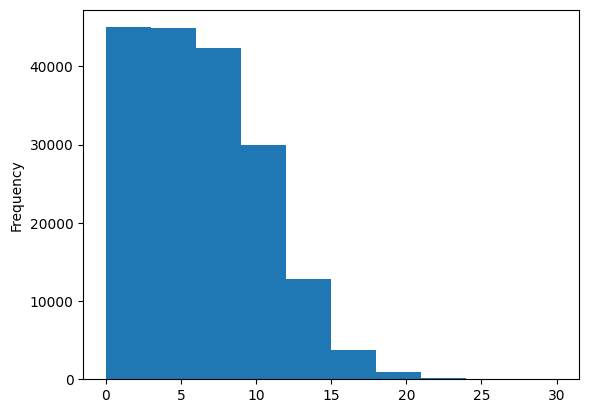

In [ ]:
train_df.line_number.plot.hist()

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(),depth=15)
len(test_df["line_number"])

30135

In [ ]:
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]


(TensorShape([180040, 15]),
 <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.

In [ ]:
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

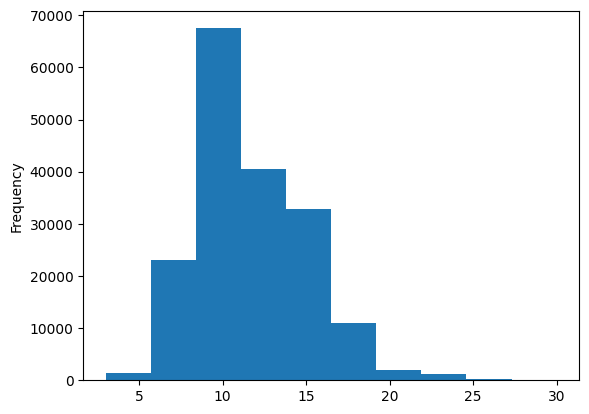

In [ ]:

# Check the distribution of total lines
train_df.total_lines.plot.hist();

In [ ]:

# Check the coverage of a "total_lines" value of 20
np.percentile(train_df.total_lines, 98)

20.0

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [ ]:
token_input=tf.keras.layers.Input(shape=[],dtype=tf.string)
x=embededlayer(token_input)
token_output=tf.keras.layers.Dense(128,activation="relu")(x)
token_model=tf.keras.Model(token_input,token_output)

char_input=tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x=char_vectorizer(char_input)
x=char_embedding(x)
char_output=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(x)
char_model=tf.keras.Model(char_input,char_output)

token_char_concat=tf.keras.layers.Concatenate()([token_model.output,char_model.output])

c_dropout=tf.keras.layers.Dropout(0.5)(token_char_concat)

line_no_input=tf.keras.layers.Input(shape=(15,),dtype=tf.float32)
line_output=tf.keras.layers.Dense(32,activation="relu")(line_no_input)
line_no_model=tf.keras.Model(line_no_input,line_output)

total_lines_input=tf.keras.layers.Input(shape=(20,),dtype=tf.float32)
total_line_output=tf.keras.layers.Dense(32,activation="relu")(total_lines_input)
total_lines_model=tf.keras.Model(total_lines_input,total_line_output)

line_total_line_concat=tf.keras.layers.Concatenate()([line_no_model.output,total_lines_model.output])

# x=tf.keras.layers.Dense(64,activation="relu")(line_total_line_concat)

total_concat=tf.keras.layers.Concatenate()([c_dropout,
                                            line_total_line_concat
                                            ])

output_layer=tf.keras.layers.Dense(5,activation="softmax")(total_concat)

model6=tf.keras.Model(inputs=[token_model.input,char_model.input,line_no_model.input,total_lines_model.input],
                      outputs=output_layer
                      )

In [ ]:
model6.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),metrics=['accuracy'])

In [ ]:
model6.fit(x=[X_train,char_train,train_line_numbers_one_hot,train_total_lines_one_hot],y=train_labels_one_hot,validation_data=([X_val,char_val,val_line_numbers_one_hot,val_total_lines_one_hot],val_labels_one_hot),
           epochs=3
           )

Epoch 1/3
5627/5627 [==============================] - 225s 39ms/step - loss: 0.9736 - accuracy: 0.8129 - val_loss: 0.9230 - val_accuracy: 0.8477
Epoch 2/3
5627/5627 [==============================] - 197s 35ms/step - loss: 0.9351 - accuracy: 0.8421 - val_loss: 0.9128 - val_accuracy: 0.8553
Epoch 3/3
5627/5627 [==============================] - 217s 39ms/step - loss: 0.9286 - accuracy: 0.8475 - val_loss: 0.9089 - val_accuracy: 0.8596


In [ ]:
len(test_line_numbers_one_hot)

30135

In [ ]:
pred6=tf.argmax(model6.predict([xtest,chartest,test_line_numbers_one_hot,test_total_lines_one_hot]),axis=1)

942/942 [==============================] - 19s 19ms/step


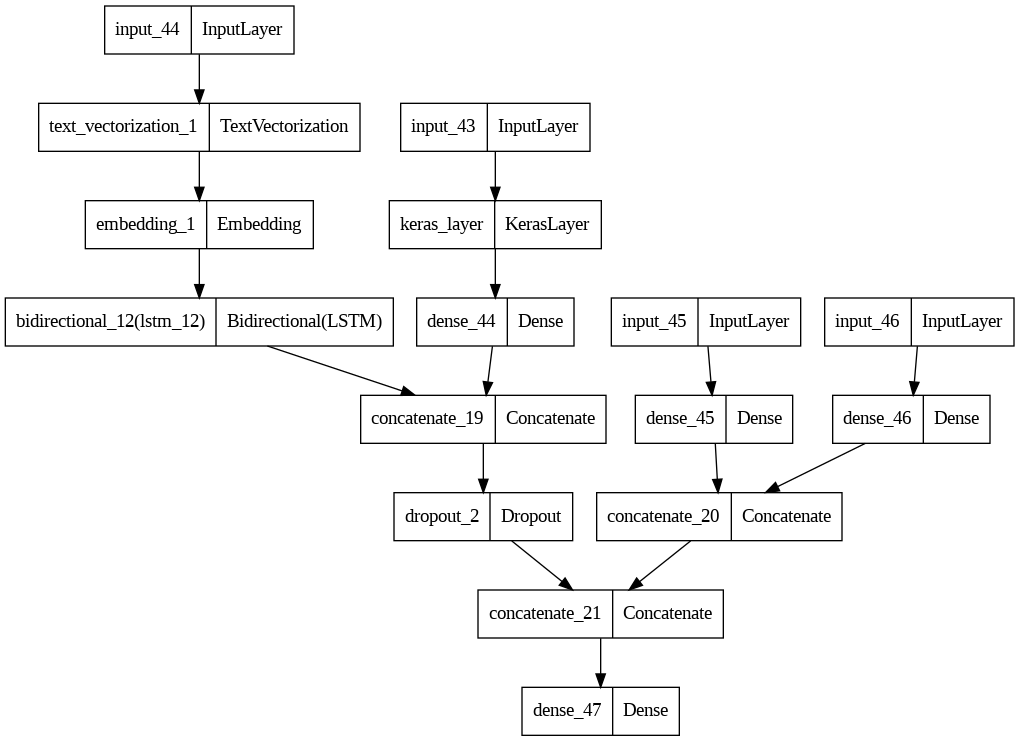

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model6)

In [ ]:
len(test_df['target'])
ytest = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))
len(ytest)
ytest=tf.argmax(ytest,axis=1)

In [ ]:
print("Classification Report:\n", classification_report(ytest, pred6))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76      3621
           1       0.87      0.87      0.87      4571
           2       0.88      0.92      0.90      9897
           3       0.79      0.53      0.63      2333
           4       0.88      0.88      0.88      9713

    accuracy                           0.85     30135
   macro avg       0.83      0.80      0.81     30135
weighted avg       0.85      0.85      0.85     30135

